In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data (adjust path as needed)
df = pd.read_csv("ecommerce_customer_data_large.csv")

# Convert Purchase Date to datetime
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], errors='coerce')

# Drop duplicates and rows with missing key values
df.drop_duplicates(inplace=True)
df.dropna(subset=['Purchase Date', 'Product Category', 'Total Purchase Amount'], inplace=True)

# Ensure numerical columns are correct type
df['Total Purchase Amount'] = pd.to_numeric(df['Total Purchase Amount'], errors='coerce')
df['Product Price'] = pd.to_numeric(df['Product Price'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')


In [2]:
df.head(10)  # shows first 10 rows

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0
5,13738,2022-08-25 06:48:33,Home,191,3,3722,Credit Card,27,1.0,Lauren Johnson,27,Female,0
6,13738,2023-07-25 05:17:24,Electronics,205,1,2773,Credit Card,27,NaN,Lauren Johnson,27,Female,0
7,13738,2023-02-05 19:31:48,Books,370,5,1486,Cash,27,1.0,Lauren Johnson,27,Female,0
8,13738,2021-12-21 03:29:05,Home,12,2,2175,Cash,27,NaN,Lauren Johnson,27,Female,0
9,13738,2023-02-09 00:53:14,Electronics,40,4,4327,Cash,27,0.0,Lauren Johnson,27,Female,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Customer ID            250000 non-null  int64         
 1   Purchase Date          250000 non-null  datetime64[ns]
 2   Product Category       250000 non-null  object        
 3   Product Price          250000 non-null  int64         
 4   Quantity               250000 non-null  int64         
 5   Total Purchase Amount  250000 non-null  int64         
 6   Payment Method         250000 non-null  object        
 7   Customer Age           250000 non-null  int64         
 8   Returns                202618 non-null  float64       
 9   Customer Name          250000 non-null  object        
 10  Age                    250000 non-null  int64         
 11  Gender                 250000 non-null  object        
 12  Churn                  250000 non-null  int6

In [4]:
# Clean data
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], errors='coerce')
df.drop_duplicates(inplace=True)
df.dropna(subset=['Purchase Date', 'Product Category', 'Total Purchase Amount'], inplace=True)
df['Total Purchase Amount'] = pd.to_numeric(df['Total Purchase Amount'], errors='coerce')
df['Product Price'] = pd.to_numeric(df['Product Price'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df.dropna(subset=['Total Purchase Amount', 'Product Price', 'Quantity'], inplace=True)

# Add Year-Month for trend analysis
df['YearMonth'] = df['Purchase Date'].dt.to_period('M')

***Category-Product Breakdown***

=== Revenue & Quantity by Product Category ===
  Product Category  Total_Revenue  Total_Quantity  Average_Price  \
0             Home      171138916          188077     255.641249   
1         Clothing      170716122          188688     254.324875   
2      Electronics      170146025          187861     254.283921   
3            Books      169345236          186608     254.721657   

   Number_of_Orders  
0             62542  
1             62581  
2             62630  
3             62247  


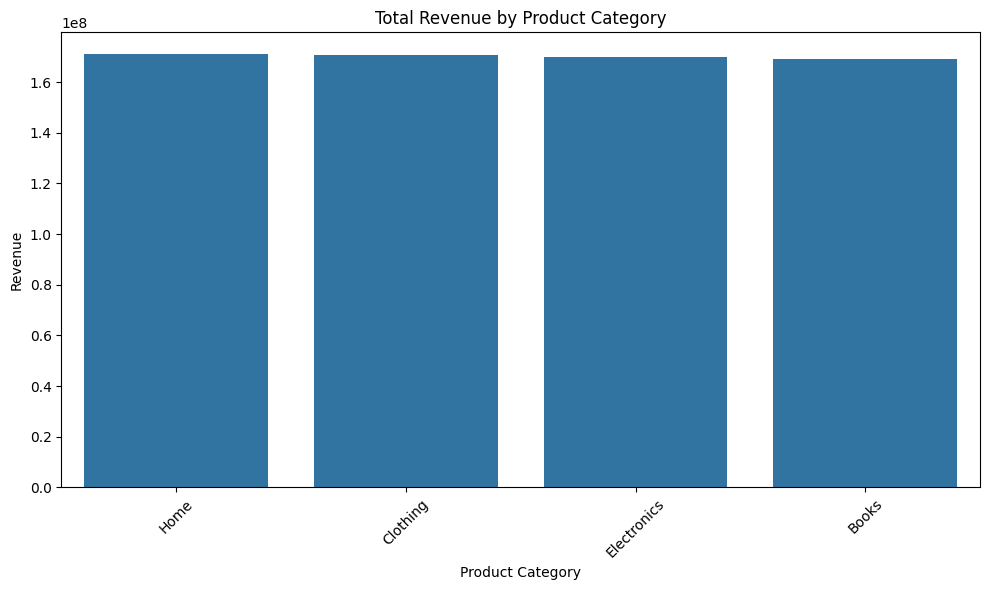

<ipython-input-8-39dd9aaa63bc>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_summary, x='Product Category', y='Total_Quantity', palette="viridis")


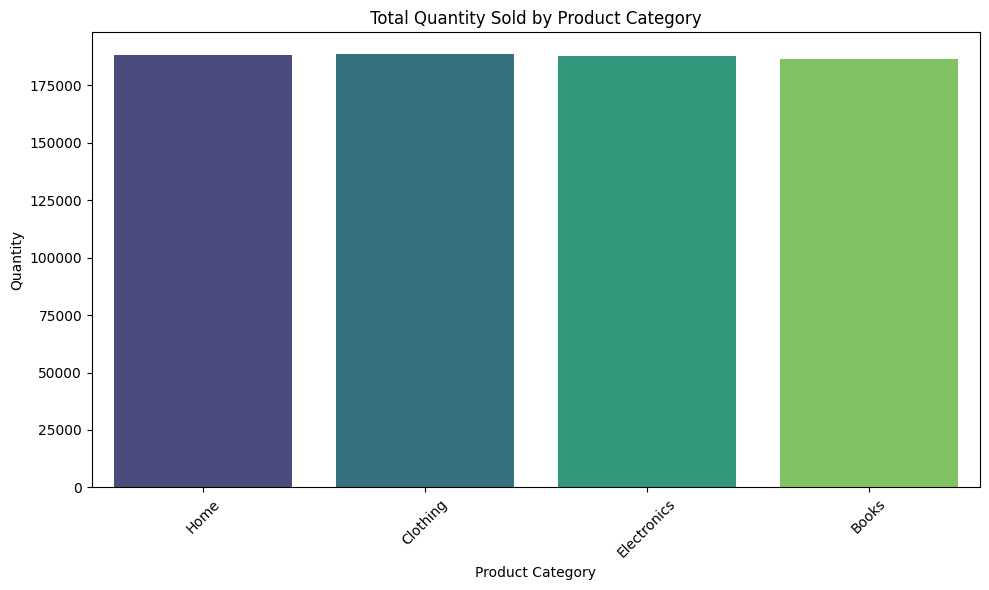

In [8]:
# Group by Product Category to get total revenue and total quantity sold
category_summary = df.groupby('Product Category').agg(
    Total_Revenue=('Total Purchase Amount', 'sum'),
    Total_Quantity=('Quantity', 'sum'),
    Average_Price=('Product Price', 'mean'),
    Number_of_Orders=('Customer ID', 'count')
).sort_values(by='Total_Revenue', ascending=False).reset_index()

# Display the summary table
print("=== Revenue & Quantity by Product Category ===")
print(category_summary)

# Optional: Save to CSV
category_summary.to_csv("category_summary.csv", index=False)

# Visualize Revenue by Category
plt.figure(figsize=(10, 6))
sns.barplot(data=category_summary, x='Product Category', y='Total_Revenue')
plt.title("Total Revenue by Product Category")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize Quantity by Category
plt.figure(figsize=(10, 6))
sns.barplot(data=category_summary, x='Product Category', y='Total_Quantity', palette="viridis")
plt.title("Total Quantity Sold by Product Category")
plt.ylabel("Quantity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

=== Pareto Analysis (Top Categories Driving 80% of Revenue) ===
  Product Category  Total_Revenue  Total_Quantity  Average_Price  \
0             Home      171138916          188077     255.641249   
1         Clothing      170716122          188688     254.324875   
2      Electronics      170146025          187861     254.283921   
3            Books      169345236          186608     254.721657   

   Number_of_Orders  Revenue_Share  Cumulative_Share  Top_80_Percent  
0             62542       0.251178          0.251178            True  
1             62581       0.250557          0.501735            True  
2             62630       0.249720          0.751455            True  
3             62247       0.248545          1.000000           False  


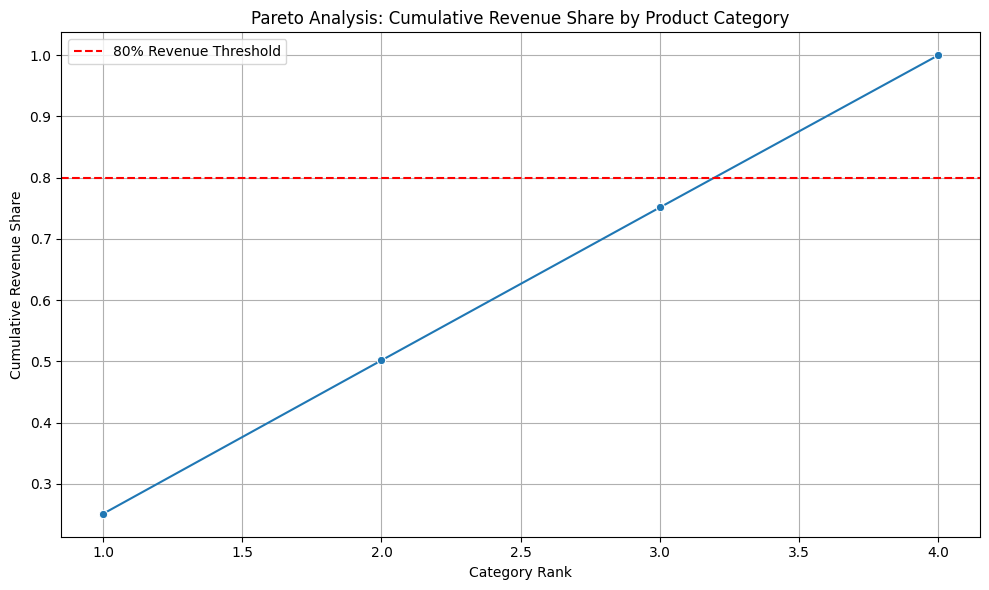

In [9]:
# Calculate cumulative revenue share
pareto = category_summary.copy()
pareto['Revenue_Share'] = pareto['Total_Revenue'] / pareto['Total_Revenue'].sum()
pareto = pareto.sort_values('Revenue_Share', ascending=False)
pareto['Cumulative_Share'] = pareto['Revenue_Share'].cumsum()

# Identify categories contributing to 80% of revenue
pareto['Top_80_Percent'] = pareto['Cumulative_Share'] <= 0.80

# Show Pareto result table
print("=== Pareto Analysis (Top Categories Driving 80% of Revenue) ===")
print(pareto)

# Visualize cumulative revenue share
plt.figure(figsize=(10, 6))
sns.lineplot(data=pareto, x=range(1, len(pareto) + 1), y='Cumulative_Share', marker='o')
plt.axhline(0.8, color='red', linestyle='--', label='80% Revenue Threshold')
plt.title("Pareto Analysis: Cumulative Revenue Share by Product Category")
plt.xlabel("Category Rank")
plt.ylabel("Cumulative Revenue Share")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [10]:
# Calculate return rate per category
returns_summary = df.groupby('Product Category').agg(
    Total_Revenue=('Total Purchase Amount', 'sum'),
    Total_Returns=('Returns', 'sum'),
    Total_Orders=('Returns', 'count')
).reset_index()
returns_summary['Return_Rate'] = returns_summary['Total_Returns'] / returns_summary['Total_Orders']

# Filter for low revenue & high return rate
threshold_revenue = returns_summary['Total_Revenue'].quantile(0.25)  # bottom 25% in revenue
threshold_return_rate = returns_summary['Return_Rate'].quantile(0.75)  # top 25% in return rate

cost_sink_products = returns_summary[
    (returns_summary['Total_Revenue'] <= threshold_revenue) &
    (returns_summary['Return_Rate'] >= threshold_return_rate)
]

# Show the cost sink products
print("=== Low-Selling Products with High Return Rates ===")
print(cost_sink_products)


=== Low-Selling Products with High Return Rates ===
  Product Category  Total_Revenue  Total_Returns  Total_Orders  Return_Rate
0            Books      169345236        25406.0         50419     0.503897


***Seasonality + Campaign Impact***

=== Monthly Revenue by Category (Calendar Order) ===
Month_Name         January  February     March     April       May      June  \
Product Category                                                               
Books             15740739  13867301  15455138  15132229  15270380  14911917   
Clothing          15227170  14362070  15860258  15219339  15364673  15208425   
Electronics       15676093  14760739  15362201  14812943  15823024  15081856   
Home              15557956  14060244  15678148  15052939  16075903  15083868   

Month_Name            July    August  September   October  November  December  
Product Category                                                               
Books             15569941  15631052   12577372  11890135  11156469  12142563  
Clothing          16054585  15590905   13082220  11666010  11390666  11689801  
Electronics       15110408  15852754   13070478  11303753  11503759  11788017  
Home              15852817  15989201   13032942  11735347  1155377

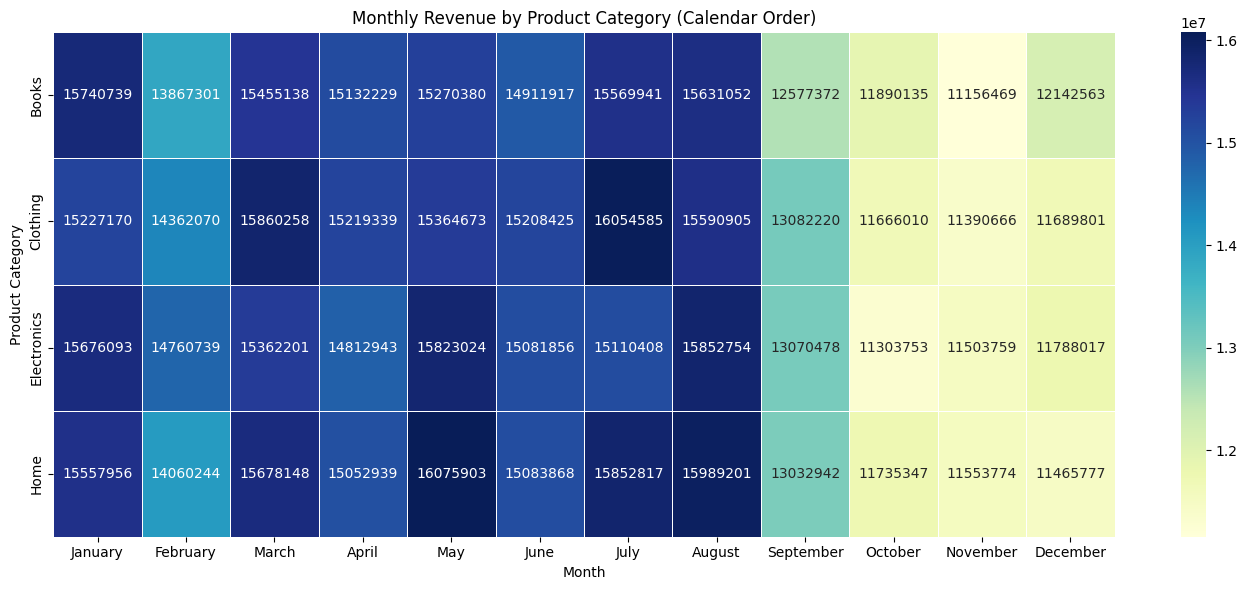

In [13]:
# Extract calendar month and month number
df['Month'] = df['Purchase Date'].dt.month
df['Month_Name'] = df['Purchase Date'].dt.month_name()

# Aggregate revenue by month and category
monthly_category = df.groupby(['Month', 'Month_Name', 'Product Category'])['Total Purchase Amount'].sum().reset_index()

# Sort by month number
monthly_category = monthly_category.sort_values('Month')

# Pivot for heatmap
pivot_table = monthly_category.pivot(index='Product Category', columns='Month_Name', values='Total Purchase Amount')

# Ensure correct calendar order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
pivot_table = pivot_table[month_order]

# Display table
print("=== Monthly Revenue by Category (Calendar Order) ===")
print(pivot_table)

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=0.5)
plt.title("Monthly Revenue by Product Category (Calendar Order)")
plt.xlabel("Month")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show()

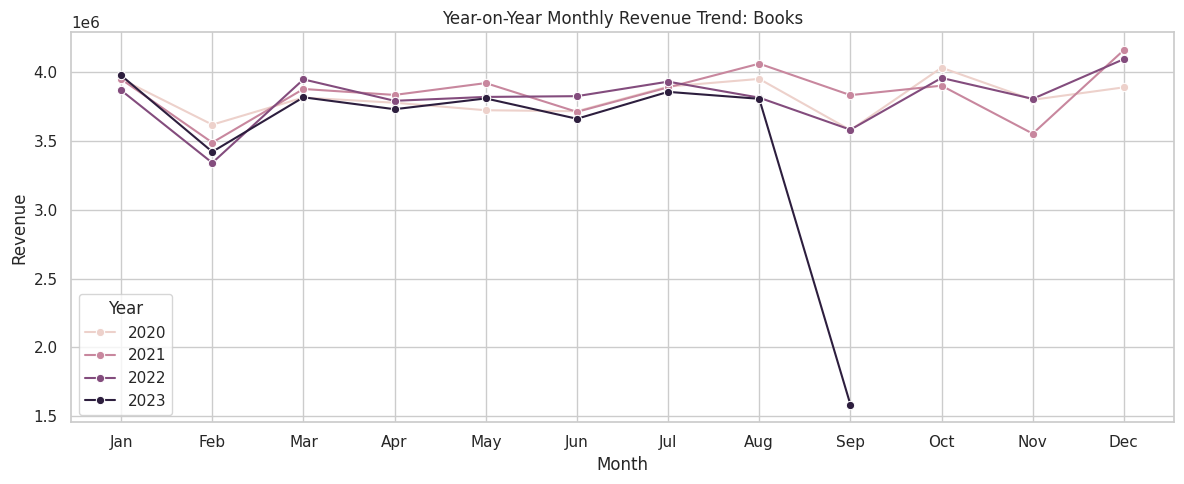

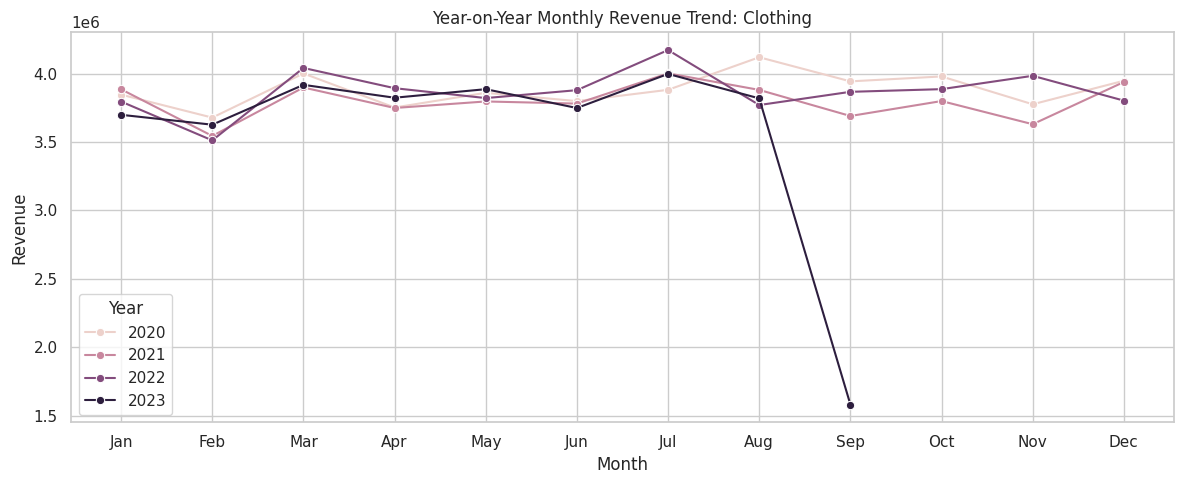

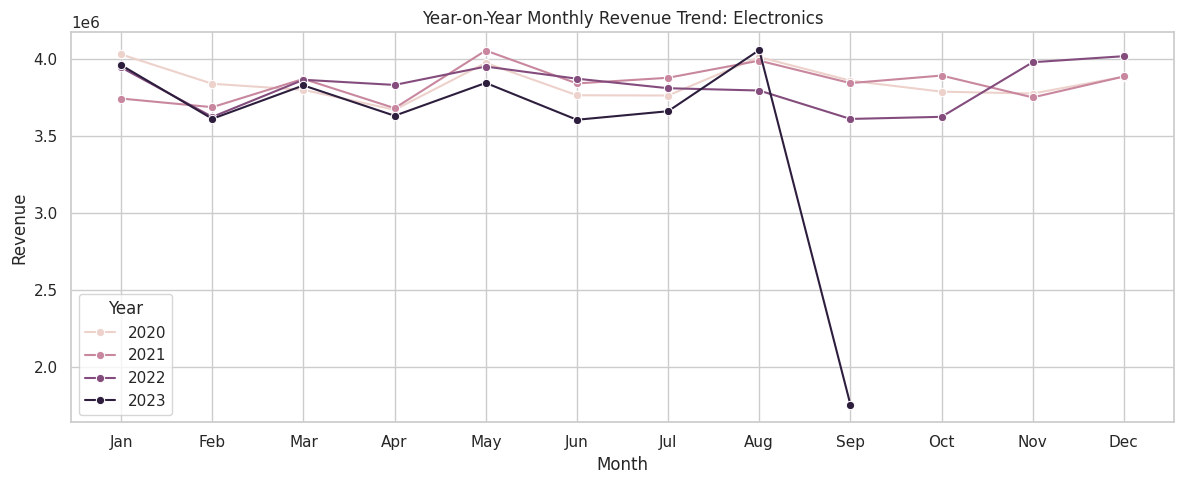

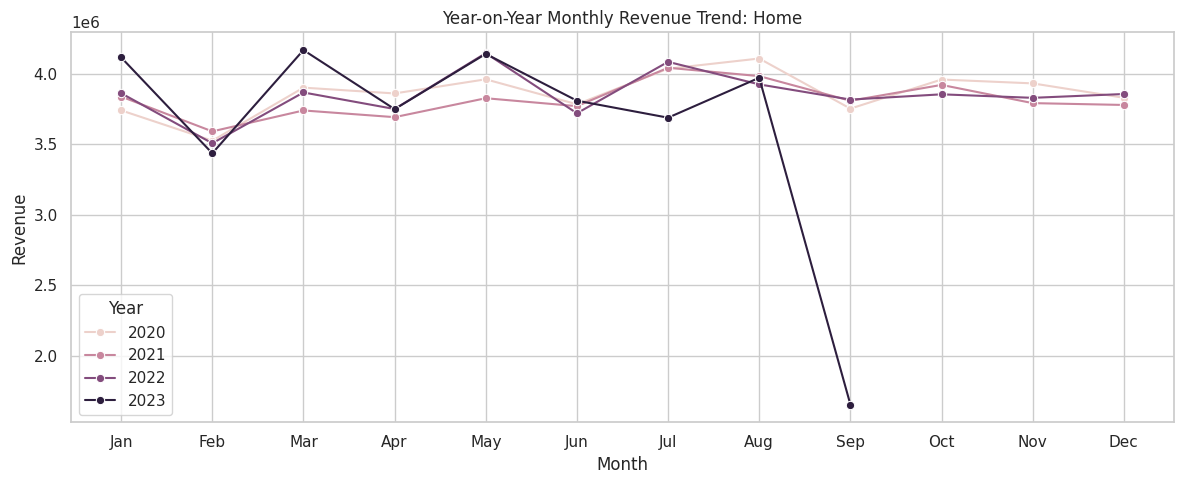

In [15]:
# Extract Year and Month
df['Year'] = df['Purchase Date'].dt.year
df['Month'] = df['Purchase Date'].dt.month
df['Month_Name'] = df['Purchase Date'].dt.month_name()

# Group by Year, Month, and Category
grouped = df.groupby(['Product Category', 'Year', 'Month'])['Total Purchase Amount'].sum().reset_index()

# Optional: limit to major categories only (e.g., top 4)
top_categories = df['Product Category'].value_counts().head(4).index.tolist()
grouped = grouped[grouped['Product Category'].isin(top_categories)]

# Plot: trend lines per category
import seaborn as sns
sns.set(style="whitegrid")

for category in grouped['Product Category'].unique():
    plt.figure(figsize=(12, 5))
    cat_data = grouped[grouped['Product Category'] == category]
    sns.lineplot(data=cat_data, x='Month', y='Total Purchase Amount', hue='Year', marker='o')
    plt.title(f"Year-on-Year Monthly Revenue Trend: {category}")
    plt.xticks(range(1, 13),
               ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.ylabel("Revenue")
    plt.xlabel("Month")
    plt.legend(title="Year")
    plt.tight_layout()
    plt.show()

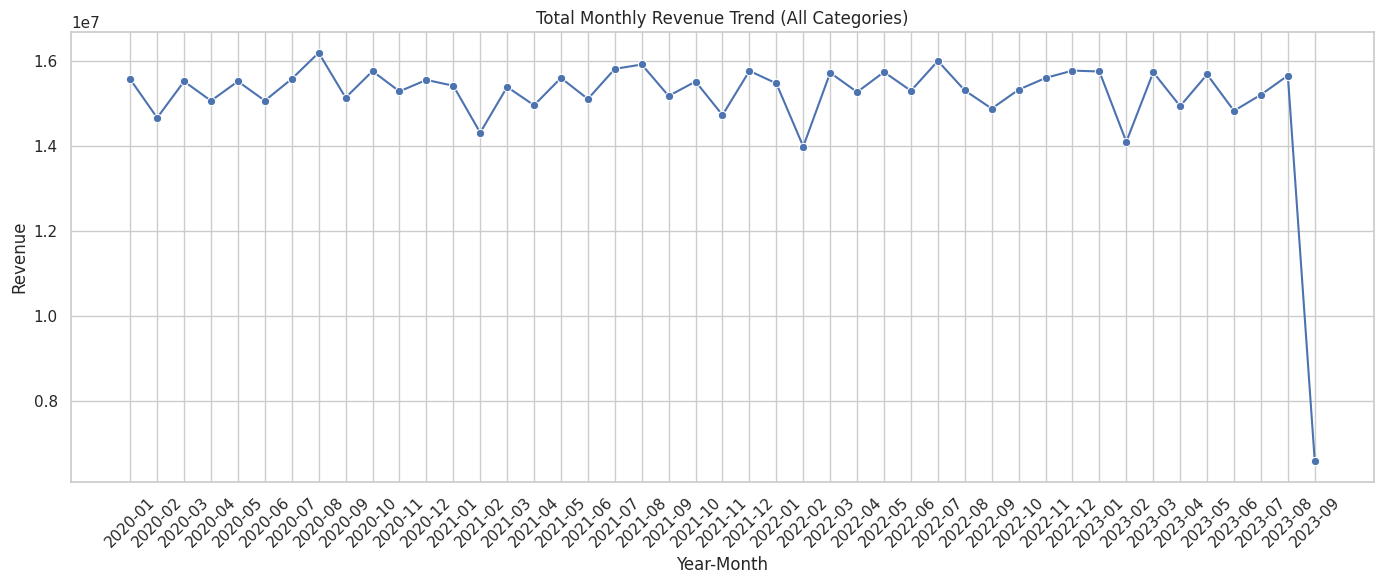

In [16]:
# Group by YearMonth and sum revenue
monthly_revenue = df.groupby('YearMonth')['Total Purchase Amount'].sum().reset_index()

# Plot total revenue trend
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_revenue, x='YearMonth', y='Total Purchase Amount', marker='o')
plt.xticks(rotation=45)
plt.title("Total Monthly Revenue Trend (All Categories)")
plt.ylabel("Revenue")
plt.xlabel("Year-Month")
plt.grid(True)
plt.tight_layout()
plt.show()

***Customer Demographics & Buying Patterns***

<ipython-input-17-20bb6483f5dc>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_cat_pref = df.groupby(['Age_Group', 'Product Category'])['Total Purchase Amount'].sum().reset_index()


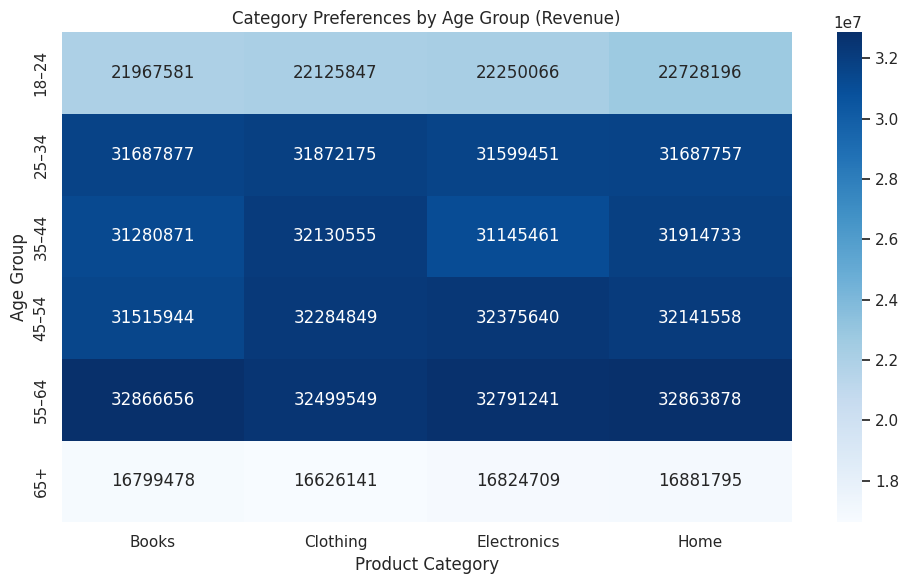

In [17]:
# Bin age into groups
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18–24', '25–34', '35–44', '45–54', '55–64', '65+']
df['Age_Group'] = pd.cut(df['Customer Age'], bins=bins, labels=labels)

# Group by Age Group and Product Category
age_cat_pref = df.groupby(['Age_Group', 'Product Category'])['Total Purchase Amount'].sum().reset_index()

# Plot heatmap of age group vs category preference
pivot_age_cat = age_cat_pref.pivot(index='Age_Group', columns='Product Category', values='Total Purchase Amount').fillna(0)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_age_cat, annot=True, fmt=".0f", cmap="Blues")
plt.title("Category Preferences by Age Group (Revenue)")
plt.ylabel("Age Group")
plt.xlabel("Product Category")
plt.tight_layout()
plt.show()


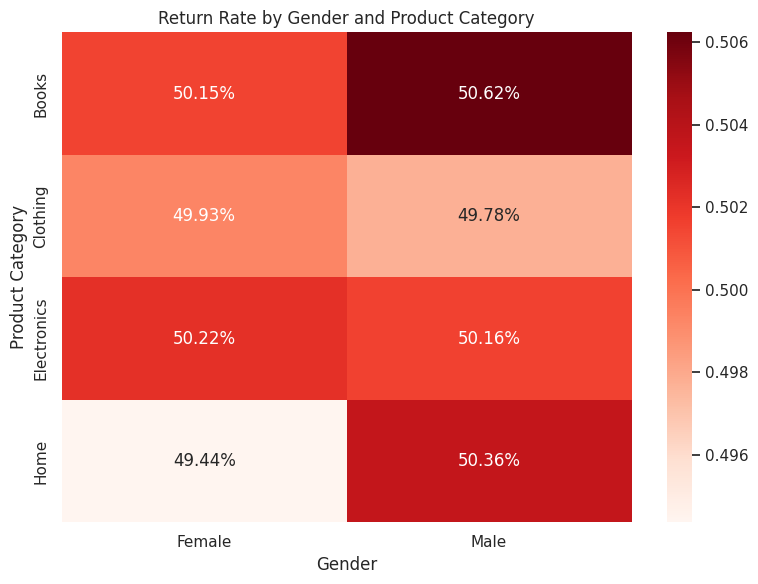

In [18]:
# Group by Gender and Category to calculate return rate
return_by_gender = df.groupby(['Gender', 'Product Category']).agg(
    Total_Returns=('Returns', 'sum'),
    Total_Orders=('Returns', 'count')
).reset_index()

return_by_gender['Return_Rate'] = return_by_gender['Total_Returns'] / return_by_gender['Total_Orders']

# Pivot for heatmap
pivot_return = return_by_gender.pivot(index='Product Category', columns='Gender', values='Return_Rate').fillna(0)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_return, annot=True, fmt=".2%", cmap="Reds")
plt.title("Return Rate by Gender and Product Category")
plt.xlabel("Gender")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show()


<ipython-input-19-18247ac7cfef>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_spend_by_age = df.groupby('Age_Group')['Total Purchase Amount'].mean().reset_index()
<ipython-input-19-18247ac7cfef>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_spend_by_age, x='Age_Group', y='Total Purchase Amount', palette='Greens')


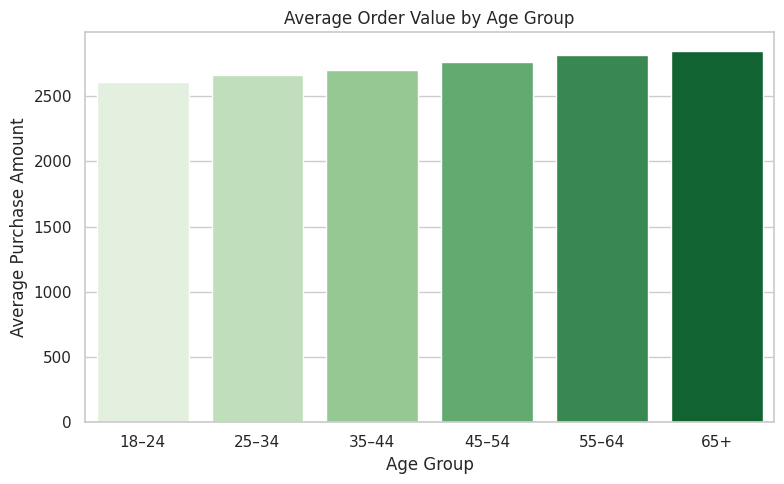

In [19]:
# Calculate average purchase amount per transaction by age group
avg_spend_by_age = df.groupby('Age_Group')['Total Purchase Amount'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_spend_by_age, x='Age_Group', y='Total Purchase Amount', palette='Greens')
plt.title("Average Order Value by Age Group")
plt.ylabel("Average Purchase Amount")
plt.xlabel("Age Group")
plt.tight_layout()
plt.show()


<ipython-input-22-5f63c21a1349>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  basket_size = df.groupby(['Age_Group', 'Gender'])['Quantity'].mean().reset_index()


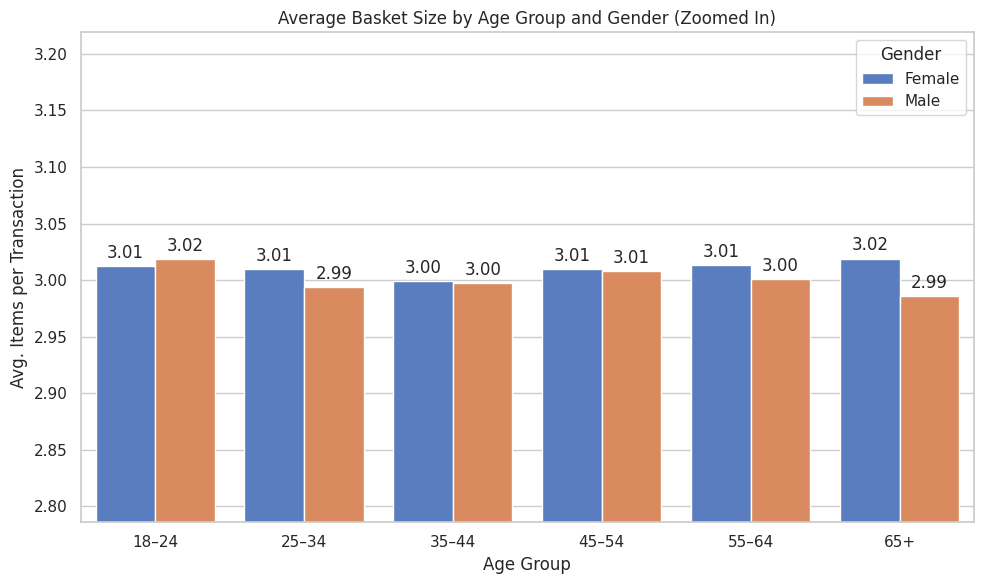

In [22]:
# Age groups
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18–24', '25–34', '35–44', '45–54', '55–64', '65+']
df['Age_Group'] = pd.cut(df['Customer Age'], bins=bins, labels=labels)

# Group & calculate average basket size
basket_size = df.groupby(['Age_Group', 'Gender'])['Quantity'].mean().reset_index()
basket_size.rename(columns={'Quantity': 'Avg_Basket_Size'}, inplace=True)

# Plot with enhanced detail
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=basket_size, x='Age_Group', y='Avg_Basket_Size', hue='Gender', palette='muted')

# Add data labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

# Zoom in y-axis to enhance differences (you can adjust min/max to suit your data)
plt.ylim(basket_size['Avg_Basket_Size'].min() - 0.2, basket_size['Avg_Basket_Size'].max() + 0.2)

plt.title("Average Basket Size by Age Group and Gender (Zoomed In)")
plt.ylabel("Avg. Items per Transaction")
plt.xlabel("Age Group")
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

<ipython-input-27-613d061ed4ac>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  payment_pref = df.groupby(['Age_Group', 'Gender', 'Payment Method']).size().reset_index(name='Count')
<ipython-input-27-613d061ed4ac>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  payment_pref['Total'] = payment_pref.groupby(['Age_Group', 'Gender'])['Count'].transform('sum')


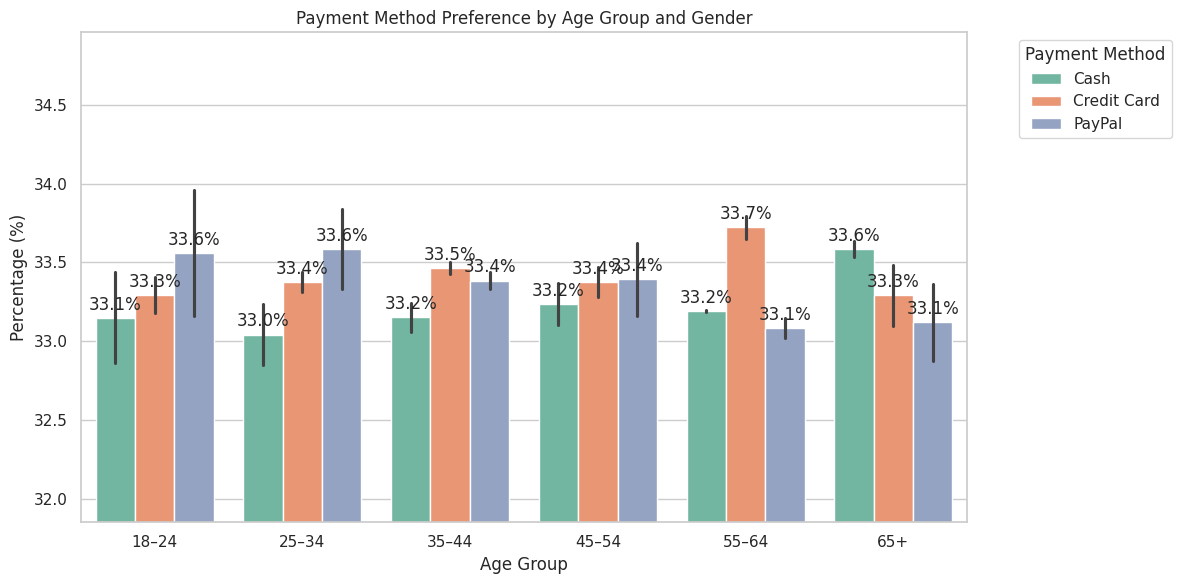

In [27]:
# Group by Age, Gender, and Payment Method
payment_pref = df.groupby(['Age_Group', 'Gender', 'Payment Method']).size().reset_index(name='Count')

# Normalize within each age-gender group to get percentages
payment_pref['Total'] = payment_pref.groupby(['Age_Group', 'Gender'])['Count'].transform('sum')
payment_pref['Percent'] = payment_pref['Count'] / payment_pref['Total'] * 100

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=grouped, x='Age_Group', y='Percent', hue='Payment Method', palette='Set2')

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3)

# Zoom into range to exaggerate differences
min_y = grouped['Percent'].min() - 1
max_y = grouped['Percent'].max() + 1
plt.ylim(min_y, max_y)

# Final
plt.title("Payment Method Preference by Age Group and Gender")
plt.ylabel("Percentage (%)")
plt.xlabel("Age Group")
plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

***Recency Analysis***

                Segment  Customer Count
0    Churned (>90 days)           35398
1  At Risk (31–90 days)            8754
2    Active (<=30 days)            5509


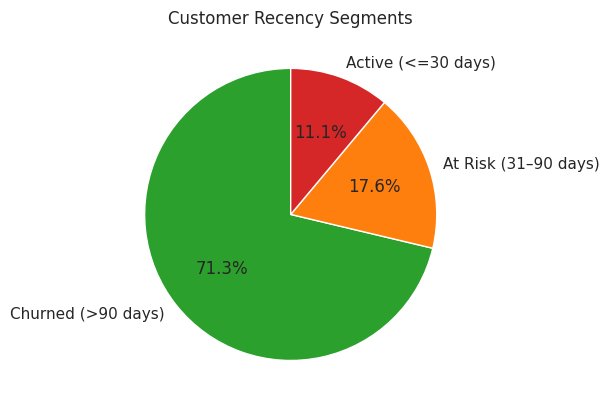

In [30]:
from datetime import datetime

# Load and clean
df = pd.read_csv("ecommerce_customer_data_large.csv")
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], errors='coerce')
df.dropna(subset=['Purchase Date', 'Customer ID'], inplace=True)

# Set analysis date (you can also use df['Purchase Date'].max())
analysis_date = df['Purchase Date'].max()

# Step 1: Last purchase per customer
last_purchase = df.groupby('Customer ID')['Purchase Date'].max().reset_index()
last_purchase.rename(columns={'Purchase Date': 'Last_Purchase_Date'}, inplace=True)

# Step 2: Calculate recency in days
last_purchase['Recency_Days'] = (analysis_date - last_purchase['Last_Purchase_Date']).dt.days

# Step 3: Segment customers
def recency_segment(days):
    if days <= 30:
        return 'Active (<=30 days)'
    elif days <= 90:
        return 'At Risk (31–90 days)'
    else:
        return 'Churned (>90 days)'

last_purchase['Recency_Segment'] = last_purchase['Recency_Days'].apply(recency_segment)

# Count of customers per segment
segment_counts = last_purchase['Recency_Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Customer Count']
print(segment_counts)


plt.figure(figsize=(6, 6))
colors = ['#2ca02c', '#ff7f0e', '#d62728']
plt.pie(segment_counts['Customer Count'], labels=segment_counts['Segment'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Customer Recency Segments")
plt.tight_layout()
plt.show()



=== Recency Segment by Age Group ===
Recency_Segment  Active (<=30 days)  At Risk (31–90 days)  Churned (>90 days)
Age_Group                                                                    
18–24                          11.1                  18.0                70.8
25–34                          10.9                  17.9                71.1
35–44                          11.1                  18.0                70.9
45–54                          11.2                  16.9                71.9
55–64                          11.3                  17.4                71.4
65+                            10.8                  17.5                71.7

=== Recency Segment by Gender ===
Recency_Segment  Active (<=30 days)  At Risk (31–90 days)  Churned (>90 days)
Gender                                                                       
Female                         10.9                  17.7                71.4
Male                           11.3                  17.6            

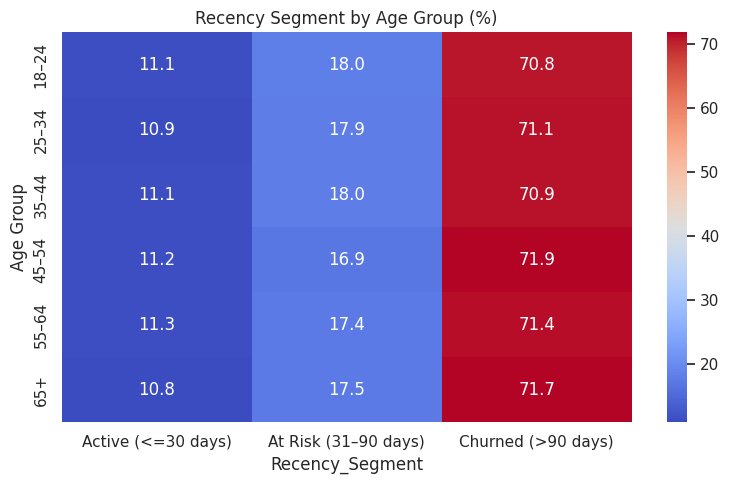

In [34]:
# Get most recent age and gender per customer
demo_info = df[['Customer ID', 'Customer Age', 'Gender']].drop_duplicates(subset='Customer ID', keep='last')

# Merge into main table
recency_full = recency_churn.merge(demo_info, on='Customer ID', how='left')

# Age group bins
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18–24', '25–34', '35–44', '45–54', '55–64', '65+']
recency_full['Age_Group'] = pd.cut(recency_full['Customer Age'], bins=bins, labels=labels)

# Crosstab: Age Group vs Recency Segment
age_cross = pd.crosstab(recency_full['Age_Group'], recency_full['Recency_Segment'], normalize='index') * 100
print("\n=== Recency Segment by Age Group ===")
print(age_cross.round(1))

# Crosstab: Gender vs Recency Segment
gender_cross = pd.crosstab(recency_full['Gender'], recency_full['Recency_Segment'], normalize='index') * 100
print("\n=== Recency Segment by Gender ===")
print(gender_cross.round(1))

# Example for Age Group heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(age_cross, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Recency Segment by Age Group (%)")
plt.ylabel("Age Group")
plt.tight_layout()
plt.show()


***Basket Size and Pricing Sensitivity***

In [37]:
# Group by payment method
basket_summary = df.groupby('Payment Method').agg(
    Avg_Basket_Size=('Quantity', 'mean'),
    Avg_Total_Purchase_Amount=('Total Purchase Amount', 'mean'),
    Transaction_Count=('Customer ID', 'count')
).reset_index()

# Display the summary table
print("=== Basket Size & Purchase Amount by Payment Method ===")
print(basket_summary.round(2))

=== Basket Size & Purchase Amount by Payment Method ===
  Payment Method  Avg_Basket_Size  Avg_Total_Purchase_Amount  \
0           Cash             3.00                    2715.56   
1    Credit Card             3.00                    2738.85   
2         PayPal             3.01                    2721.68   

   Transaction_Count  
0              83012  
1              83547  
2              83441  


In [38]:
# Age group binning (if Customer Age exists)
df.dropna(subset=['Customer Age', 'Gender'], inplace=True)
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18–24', '25–34', '35–44', '45–54', '55–64', '65+']
df['Age_Group'] = pd.cut(df['Customer Age'], bins=bins, labels=labels)

# Group by Age and Gender
age_gender_summary = df.groupby(['Age_Group', 'Gender']).agg(
    Avg_Basket_Size=('Quantity', 'mean'),
    Avg_Total_Purchase_Amount=('Total Purchase Amount', 'mean'),
    Transaction_Count=('Customer ID', 'count')
).reset_index()

print("\n=== Basket Size & Spend by Age Group and Gender ===")
print(age_gender_summary.round(2))



=== Basket Size & Spend by Age Group and Gender ===
   Age_Group  Gender  Avg_Basket_Size  Avg_Total_Purchase_Amount  \
0      18–24  Female             3.01                    2602.23   
1      18–24    Male             3.02                    2608.13   
2      25–34  Female             3.01                    2655.10   
3      25–34    Male             2.99                    2673.19   
4      35–44  Female             3.00                    2704.81   
5      35–44    Male             3.00                    2697.13   
6      45–54  Female             3.01                    2755.84   
7      45–54    Male             3.01                    2763.78   
8      55–64  Female             3.01                    2815.09   
9      55–64    Male             3.00                    2819.46   
10       65+  Female             3.02                    2843.17   
11       65+    Male             2.99                    2850.20   

    Transaction_Count  
0               16993  
1             

<ipython-input-38-64f2abba886f>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_summary = df.groupby(['Age_Group', 'Gender']).agg(


Most common basket size (number of items per purchase): 4


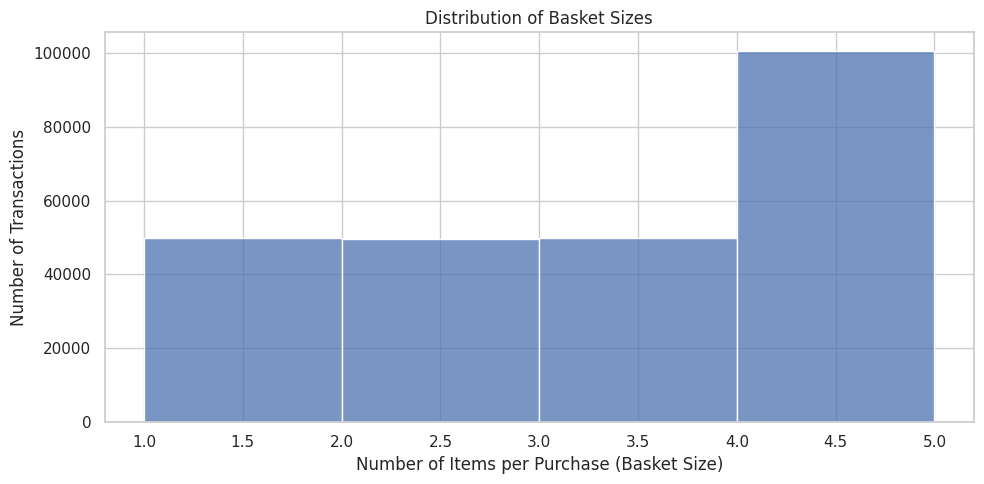

In [39]:
# Round Quantity to integers just in case
df['Quantity'] = df['Quantity'].astype(int)

# Find the mode
most_common_basket_size = df['Quantity'].mode().iloc[0]
print(f"Most common basket size (number of items per purchase): {most_common_basket_size}")

# Plot histogram of basket sizes
plt.figure(figsize=(10, 5))
sns.histplot(df['Quantity'], bins=range(1, df['Quantity'].max()+1), kde=False)
plt.title("Distribution of Basket Sizes")
plt.xlabel("Number of Items per Purchase (Basket Size)")
plt.ylabel("Number of Transactions")
plt.tight_layout()
plt.show()